In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,ActivityRegularization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [48]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.9999
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

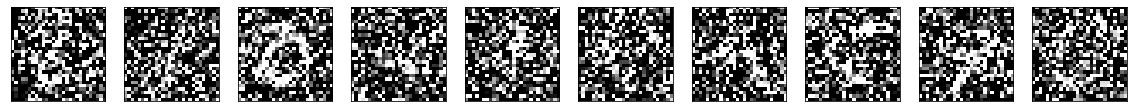

In [49]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(input_layer,output_layer,optimizer,epochs,batch_size):
    autoencoder = Model(input_layer,output_layer)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer")
    hist = autoencoder.fit(x_train_noisy,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test_noisy,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [51]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = ActivityRegularization(l1=1e-5)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

With adam optimizer
Epoch 1/10
59/59 [==============================] - 3s 43ms/step - loss: 0.4329 - mean_squared_error: 0.1117 - val_loss: 0.2744 - val_mean_squared_error: 0.0669
Epoch 2/10
59/59 [==============================] - 2s 37ms/step - loss: 0.2478 - mean_squared_error: 0.0589 - val_loss: 0.2304 - val_mean_squared_error: 0.0534
Epoch 3/10
59/59 [==============================] - 2s 35ms/step - loss: 0.2229 - mean_squared_error: 0.0510 - val_loss: 0.2155 - val_mean_squared_error: 0.0487
Epoch 4/10
59/59 [==============================] - 2s 35ms/step - loss: 0.2112 - mean_squared_error: 0.0470 - val_loss: 0.2044 - val_mean_squared_error: 0.0448
Epoch 5/10
59/59 [==============================] - 2s 35ms/step - loss: 0.2023 - mean_squared_error: 0.0440 - val_loss: 0.1980 - val_mean_squared_error: 0.0427
Epoch 6/10
59/59 [==============================] - 2s 35ms/step - loss: 0.1967 - mean_squared_error: 0.0423 - val_loss: 0.1933 - val_mean_squared_error: 0.0413
Epoch 7/10
59/

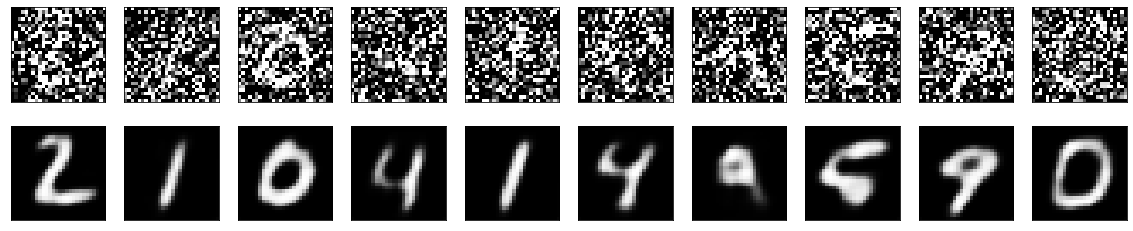

With rmsprop optimizer
Epoch 1/10
59/59 [==============================] - 3s 39ms/step - loss: 0.2157 - mean_squared_error: 0.0487 - val_loss: 0.1973 - val_mean_squared_error: 0.0433
Epoch 2/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1958 - mean_squared_error: 0.0426 - val_loss: 0.1946 - val_mean_squared_error: 0.0423
Epoch 3/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1913 - mean_squared_error: 0.0411 - val_loss: 0.1853 - val_mean_squared_error: 0.0395
Epoch 4/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1883 - mean_squared_error: 0.0402 - val_loss: 0.1857 - val_mean_squared_error: 0.0393
Epoch 5/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1856 - mean_squared_error: 0.0393 - val_loss: 0.1818 - val_mean_squared_error: 0.0382
Epoch 6/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1832 - mean_squared_error: 0.0385 - val_loss: 0.1805 - val_mean_squared_error: 0.0377
Epoch 7/10


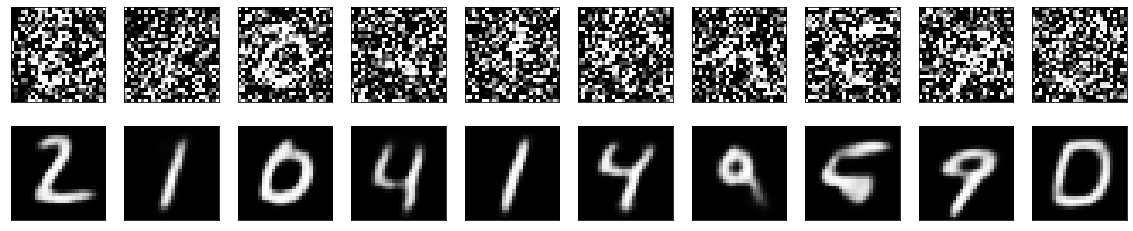

With adadelta optimizer
Epoch 1/10
59/59 [==============================] - 3s 38ms/step - loss: 0.1764 - mean_squared_error: 0.0362 - val_loss: 0.1753 - val_mean_squared_error: 0.0360
Epoch 2/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1758 - mean_squared_error: 0.0360 - val_loss: 0.1747 - val_mean_squared_error: 0.0358
Epoch 3/10
59/59 [==============================] - 2s 35ms/step - loss: 0.1753 - mean_squared_error: 0.0359 - val_loss: 0.1743 - val_mean_squared_error: 0.0356
Epoch 4/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1749 - mean_squared_error: 0.0357 - val_loss: 0.1739 - val_mean_squared_error: 0.0355
Epoch 5/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1746 - mean_squared_error: 0.0356 - val_loss: 0.1736 - val_mean_squared_error: 0.0354
Epoch 6/10
59/59 [==============================] - 2s 35ms/step - loss: 0.1743 - mean_squared_error: 0.0356 - val_loss: 0.1734 - val_mean_squared_error: 0.0354
Epoch 7/10

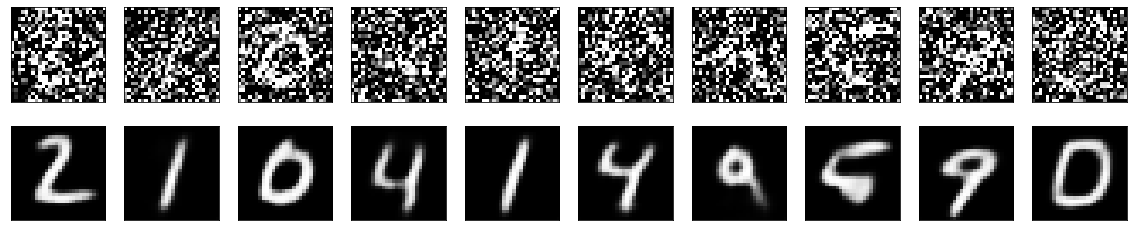

With adagrad optimizer
Epoch 1/10
59/59 [==============================] - 3s 41ms/step - loss: 0.1737 - mean_squared_error: 0.0354 - val_loss: 0.1728 - val_mean_squared_error: 0.0352
Epoch 2/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1737 - mean_squared_error: 0.0354 - val_loss: 0.1728 - val_mean_squared_error: 0.0352
Epoch 3/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1736 - mean_squared_error: 0.0354 - val_loss: 0.1727 - val_mean_squared_error: 0.0352
Epoch 4/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1736 - mean_squared_error: 0.0354 - val_loss: 0.1727 - val_mean_squared_error: 0.0352
Epoch 5/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1736 - mean_squared_error: 0.0354 - val_loss: 0.1727 - val_mean_squared_error: 0.0352
Epoch 6/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1736 - mean_squared_error: 0.0354 - val_loss: 0.1727 - val_mean_squared_error: 0.0352
Epoch 7/10


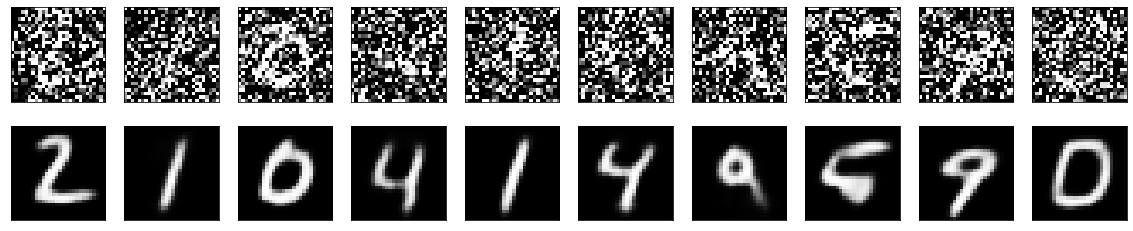

With nadam optimizer
Epoch 1/10
59/59 [==============================] - 3s 40ms/step - loss: 0.1739 - mean_squared_error: 0.0355 - val_loss: 0.1724 - val_mean_squared_error: 0.0350
Epoch 2/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1727 - mean_squared_error: 0.0351 - val_loss: 0.1707 - val_mean_squared_error: 0.0345
Epoch 3/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1717 - mean_squared_error: 0.0347 - val_loss: 0.1700 - val_mean_squared_error: 0.0343
Epoch 4/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1708 - mean_squared_error: 0.0344 - val_loss: 0.1696 - val_mean_squared_error: 0.0342
Epoch 5/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1699 - mean_squared_error: 0.0341 - val_loss: 0.1690 - val_mean_squared_error: 0.0340
Epoch 6/10
59/59 [==============================] - 2s 37ms/step - loss: 0.1692 - mean_squared_error: 0.0339 - val_loss: 0.1680 - val_mean_squared_error: 0.0336
Epoch 7/10
59

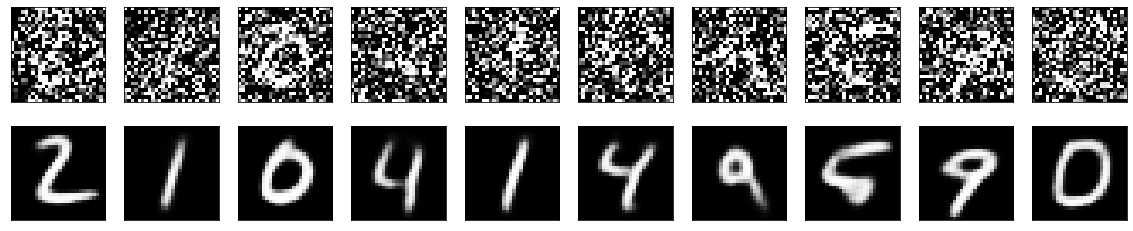

With sgd optimizer
Epoch 1/10
59/59 [==============================] - 3s 39ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 2/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 3/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 4/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 5/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 6/10
59/59 [==============================] - 2s 36ms/step - loss: 0.1657 - mean_squared_error: 0.0328 - val_loss: 0.1652 - val_mean_squared_error: 0.0328
Epoch 7/10
59/5

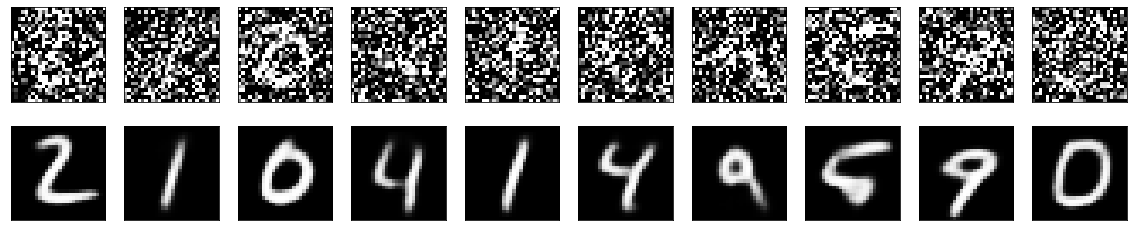

In [52]:
for i in ["adam","rmsprop","adadelta","adagrad","nadam","sgd"]:
    train_model(input_img,decoded,i,10,1024)